In [32]:
import cv2
import os
import torch
from ultralytics import YOLOv10

In [51]:
model_path='/home/achintya-trn0175/Desktop/training/yolov10/runs/detect/train/weights/best.pt'
pretrained_model="yolov10x.pt"

In [52]:
model = YOLOv10(model_path)
pretrained_model = YOLOv10(pretrained_model)

In [53]:
class_confidence_thresholds = {
    "auto": 0.5,   # Threshold for class 0
    "person": 0.5,   # Threshold for class 1
    "bicycle": 0.5,   # Threshold for class 2
    "car": 0.6,   # Threshold for class 3
    "motorbike": 0.6,   # Threshold for class 4
    "bus": 0.4,   # Threshold for class 5
    "truck": 0.3,   # Threshold for class 6
    "trafficlight": 0.15,   # Threshold for class 7
    "stopsign": 0.3,   # Threshold for class 8
    "cat": 0.4,   # Threshold for class 9
    "dog": 0.4,  # Threshold for class 10
    "cow": 0.4   # Threshold for class 11
}


In [54]:
# Perform prediction
# .txt -> path 
# load
# 
results = model(source='/home/achintya-trn0175/Desktop/yt-Driving_in_New_Delhi_|_East_to_South_|_4K_60_UHD-062824-location--(EFPiT)-802.jpg', conf=0.2)
pretrained_results= pretrained_model(source = '/home/achintya-trn0175/Desktop/yt-Driving_in_New_Delhi_|_East_to_South_|_4K_60_UHD-062824-location--(EFPiT)-802.jpg',conf=0.2)


image 1/1 /home/achintya-trn0175/Desktop/yt-Driving_in_New_Delhi_|_East_to_South_|_4K_60_UHD-062824-location--(EFPiT)-802.jpg: 384x640 2 autos, 5 cars, 5 motorbikes, 2 trafficlights, 4 stopsigns, 8.4ms
Speed: 1.2ms preprocess, 8.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/achintya-trn0175/Desktop/yt-Driving_in_New_Delhi_|_East_to_South_|_4K_60_UHD-062824-location--(EFPiT)-802.jpg: 384x640 7 0s, 7 2s, 2 3s, 1 5, 3 9s, 74.0ms
Speed: 0.6ms preprocess, 74.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


In [55]:
results= results[0].boxes
pretrained_results=pretrained_results[0].boxes

In [56]:
print(results)
print(pretrained_results)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 0., 3., 3., 4., 4., 8., 7., 4., 4., 0., 8., 8., 8., 4., 7., 3., 3.], device='cuda:0')
conf: tensor([0.9598, 0.9177, 0.9162, 0.8849, 0.8617, 0.8379, 0.7738, 0.5880, 0.5734, 0.5606, 0.5379, 0.5296, 0.4486, 0.3357, 0.2543, 0.2419, 0.2058, 0.2054], device='cuda:0')
data: tensor([[6.6073e+00, 1.9948e+02, 2.5678e+02, 3.4045e+02, 9.5981e-01, 3.0000e+00],
        [1.8729e+00, 1.7746e+02, 1.0957e+02, 2.6056e+02, 9.1766e-01, 0.0000e+00],
        [2.3808e+02, 1.7867e+02, 2.9791e+02, 2.2100e+02, 9.1623e-01, 3.0000e+00],
        [3.2901e+02, 1.7516e+02, 3.7696e+02, 2.1175e+02, 8.8491e-01, 3.0000e+00],
        [3.9045e+02, 1.8422e+02, 4.0766e+02, 2.1301e+02, 8.6166e-01, 4.0000e+00],
        [4.1293e+02, 1.8696e+02, 4.3408e+02, 2.1698e+02, 8.3793e-01, 4.0000e+00],
        [4.6544e+02, 2.0673e+02, 4.8049e+02, 2.4303e+02, 7.7383e-01, 8.0000e+00],
        [2.6945e+02, 4.1573e+01, 2.8048e+02, 6.9931e+01, 5.8805e-01, 7.0000e+00],
 

In [67]:
# Access class indices and confidence scores
class_indices = results.cls.tolist()
confidence_scores = results.conf.tolist()
#pretrained
class_indices_pretrained = pretrained_results.cls.tolist()
confidence_scores_pretrained = pretrained_results.conf.tolist()


# Access bounding box coordinates
xyxy_boxes = results.xyxy.tolist()  # List of [xmin, ymin, xmax, ymax]
xywh_boxes = results.xywh.tolist()  # List of [x, y, width, height]

#pretrained_results
xyxy_boxes_pretrained = pretrained_results.xyxy.tolist()  # List of [xmin, ymin, xmax, ymax]
xywh_boxes_pretrained = pretrained_results.xywh.tolist()  # List of [x, y, width, height]

In [71]:
import yaml

#custom trained
# Load class names from YAML
with open('classes_custom.yaml', 'r') as f:
    class_names = yaml.safe_load(f)

#pretrained
with open('classes.yaml', 'r') as f:
    class_names_pretrained = yaml.safe_load(f)


In [72]:
print(class_names)

{0: 'auto', 1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorbike', 5: 'bus', 6: 'truck', 7: 'trafficlight', 8: 'stopsign', 9: 'cat', 10: 'dog', 11: 'cow'}


In [73]:
print(class_names_pretrained)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [66]:
# Initialize filtered detections list
filtered_detections = []

# Iterate through detections
for i in range(len(results.cls)):
    class_index = int(results.cls[i])
    if class_index in class_names:
        class_name = class_names[class_index]
        confidence = float(results.conf[i])
        bbox = results.xyxy[i].tolist()  # Assuming xyxy format is used

        # Check if the confidence meets the threshold for the class
        if confidence > class_confidence_thresholds.get(class_name, 0.2):
            filtered_detections.append({
                'class': class_name,
                'confidence': confidence,
                'bbox': bbox
            })

In [48]:
print(filtered_detections)

[{'class': 'car', 'confidence': 0.9598119854927063, 'bbox': [6.6072998046875, 199.47683715820312, 256.7804260253906, 340.4496154785156]}, {'class': 'auto', 'confidence': 0.9176564812660217, 'bbox': [1.8729095458984375, 177.46066284179688, 109.56758117675781, 260.5640563964844]}, {'class': 'car', 'confidence': 0.9162296056747437, 'bbox': [238.08377075195312, 178.67489624023438, 297.9064636230469, 221.00424194335938]}, {'class': 'car', 'confidence': 0.884912371635437, 'bbox': [329.0103759765625, 175.16213989257812, 376.96051025390625, 211.75296020507812]}, {'class': 'motorbike', 'confidence': 0.8616578578948975, 'bbox': [390.4484558105469, 184.22186279296875, 407.6596984863281, 213.01434326171875]}, {'class': 'motorbike', 'confidence': 0.8379349112510681, 'bbox': [412.934326171875, 186.95960998535156, 434.08349609375, 216.98255920410156]}, {'class': 'stopsign', 'confidence': 0.7738325595855713, 'bbox': [465.4415588378906, 206.73117065429688, 480.4880065917969, 243.03445434570312]}, {'cla

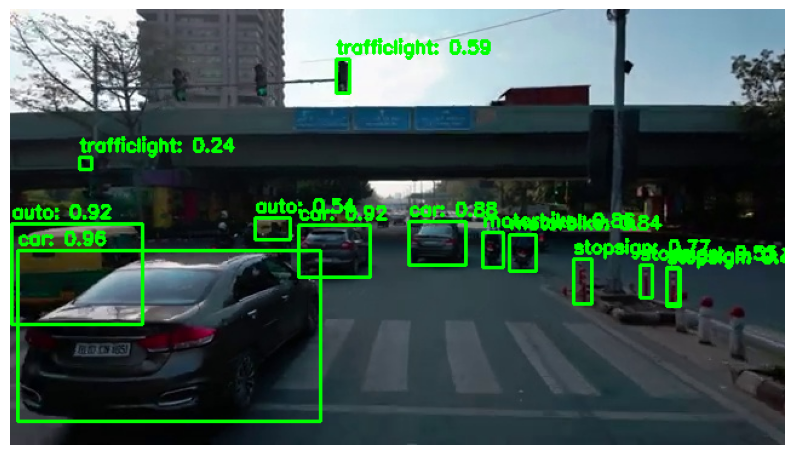

In [49]:
import matplotlib.pyplot as plt

# Load the original image
image_path = '/home/achintya-trn0175/Desktop/yt-Driving_in_New_Delhi_|_East_to_South_|_4K_60_UHD-062824-location--(EFPiT)-802.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Assuming filtered_detections contains the filtered results as described earlier
for detection in filtered_detections:
    class_name = detection['class']
    bbox = detection['bbox']
    confidence = detection['confidence']

    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox

    # Draw bounding box on the image
    cv2.rectangle(image_rgb, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
    text = f'{class_name}: {confidence:.2f}'
    cv2.putText(image_rgb, text, (int(xmin), int(ymin - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


## __Pretrained__ 

In [74]:
# Initialize filtered detections list
filtered_detections_pretrained = []

# Iterate through detections
for i in range(len(pretrained_results.cls)):
    class_index = int(pretrained_results.cls[i])
    if class_index in class_names_pretrained:
        class_name = class_names_pretrained[class_index]
        confidence = float(pretrained_results.conf[i])
        bbox = pretrained_results.xyxy[i].tolist()  # Assuming xyxy format is used

        # Check if the confidence meets the threshold for the class
        if confidence > class_confidence_thresholds.get(class_name, 0.2):
            filtered_detections_pretrained.append({
                'class': class_name,
                'confidence': confidence,
                'bbox': bbox
            })

In [75]:
print(filtered_detections_pretrained)

[{'class': 'car', 'confidence': 0.9458789825439453, 'bbox': [6.905006408691406, 200.10467529296875, 257.9705505371094, 342.23358154296875]}, {'class': 'car', 'confidence': 0.8945253491401672, 'bbox': [238.53982543945312, 179.5311279296875, 298.0140075683594, 221.21844482421875]}, {'class': 'car', 'confidence': 0.8940114974975586, 'bbox': [330.2220153808594, 175.28367614746094, 376.8142395019531, 211.86412048339844]}, {'class': 'motorcycle', 'confidence': 0.7753276824951172, 'bbox': [391.56341552734375, 189.65599060058594, 405.36212158203125, 212.4618377685547]}, {'class': 'traffic light', 'confidence': 0.7610979676246643, 'bbox': [270.143310546875, 41.98029327392578, 279.42669677734375, 69.8535385131836]}, {'class': 'motorcycle', 'confidence': 0.7323113083839417, 'bbox': [414.65716552734375, 192.84625244140625, 433.0704345703125, 215.73248291015625]}, {'class': 'traffic light', 'confidence': 0.7183462977409363, 'bbox': [200.9703369140625, 45.43305587768555, 212.679443359375, 72.8624114

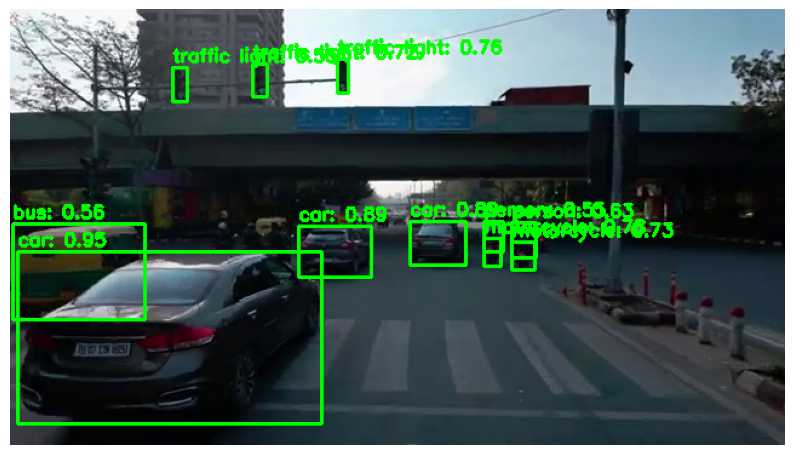

In [77]:
import matplotlib.pyplot as plt

# Load the original image
image_path = '/home/achintya-trn0175/Desktop/yt-Driving_in_New_Delhi_|_East_to_South_|_4K_60_UHD-062824-location--(EFPiT)-802.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Assuming filtered_detections contains the filtered results as described earlier
for detection in filtered_detections_pretrained:
    class_name = detection['class']
    bbox = detection['bbox']
    confidence = detection['confidence']

    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox

    # Draw bounding box on the image
    cv2.rectangle(image_rgb, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
    text = f'{class_name}: {confidence:.2f}'
    cv2.putText(image_rgb, text, (int(xmin), int(ymin - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
